In [1]:
#importing the necesarry libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing the dataset
df=pd.read_csv(r'C:\Users\hp\Desktop\ML\DATASETS\games.csv')
df.head()

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,12333,boardgame,Twilight Struggle,2005.0,2.0,2.0,180.0,180.0,180.0,13.0,20113,8.33774,8.22186,26647,372,1219,5865,5347,2562,3.4785
1,120677,boardgame,Terra Mystica,2012.0,2.0,5.0,150.0,60.0,150.0,12.0,14383,8.28798,8.14232,16519,132,1586,6277,2526,1423,3.8939
2,102794,boardgame,Caverna: The Cave Farmers,2013.0,1.0,7.0,210.0,30.0,210.0,12.0,9262,8.28994,8.06886,12230,99,1476,5600,1700,777,3.7761
3,25613,boardgame,Through the Ages: A Story of Civilization,2006.0,2.0,4.0,240.0,240.0,240.0,12.0,13294,8.20407,8.05804,14343,362,1084,5075,3378,1642,4.1590
4,3076,boardgame,Puerto Rico,2002.0,2.0,5.0,150.0,90.0,150.0,12.0,39883,8.14261,8.04524,44362,795,861,5414,9173,5213,3.2943


In [3]:
df.shape

(81312, 20)

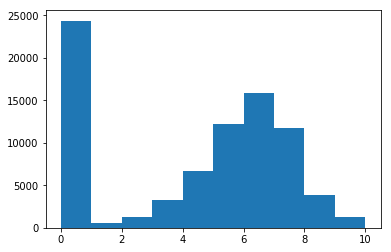

In [4]:
#generating the histograms of the 'average_rating' column as we want to predict
#the rating of the game based on several factors
plt.hist(df['average_rating'])
plt.show()

In [5]:
#as we see there is a huge building in the rating of 0..we need to view its data
#as it gonna effect the prediction

#for printing the rows of 0 avg_rating 
print(df[df['average_rating'] == 0].iloc[0]) #iloc[0] will give the first zeroth rating row

#print the first row of avg rating greater than zero
print(df[df['average_rating'] > 0].iloc[0])

id                             318
type                     boardgame
name                    Looney Leo
yearpublished                    0
minplayers                       0
maxplayers                       0
playingtime                      0
minplaytime                      0
maxplaytime                      0
minage                           0
users_rated                      0
average_rating                   0
bayes_average_rating             0
total_owners                     0
total_traders                    0
total_wanters                    0
total_wishers                    1
total_comments                   0
total_weights                    0
average_weight                   0
Name: 13048, dtype: object
id                                  12333
type                            boardgame
name                    Twilight Struggle
yearpublished                        2005
minplayers                              2
maxplayers                              2
playingtime          

(56894, 20)


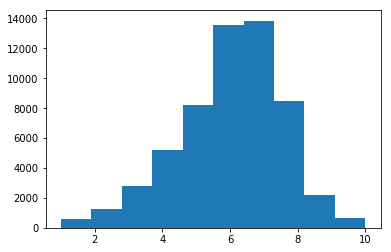

In [6]:
#cleansing the data
df = df[df['users_rated'] > 0]

#removing the null values
df = df.dropna(axis=0)

print(df.shape)

#generating the histogram of avg_rating
plt.hist(df['average_rating'])
plt.show()

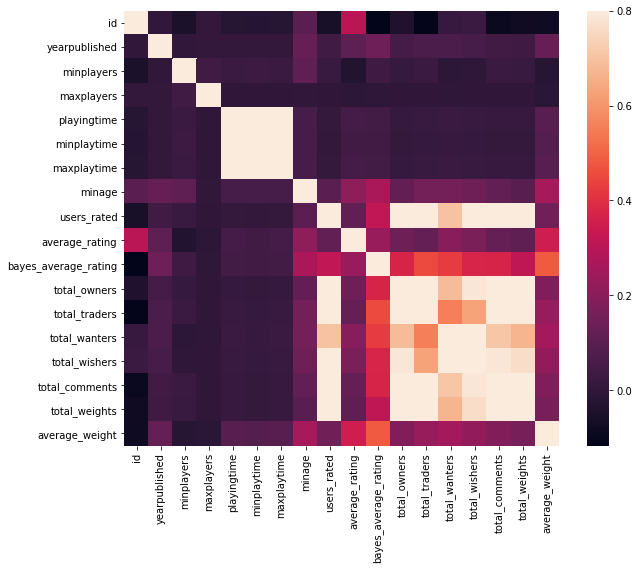

In [7]:
#correlation matrix
corrmat = df.corr()
fig = plt.figure(figsize = (10,8))
sns.heatmap(corrmat, vmax=.8, square=True)

In [9]:
#selecting the necesarry columns which will be fitted
labels = df.drop(['id', 'name', 'average_rating', 'type', 'bayes_average_rating'], axis=1)

#selecting the target value which is to be predicted
target = df.loc[:,['average_rating']]

print(labels.shape)
print(target.shape)

(56894, 15)
(56894, 1)


In [11]:
#splitting the data into training and test set using cross validation
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(labels, target, test_size=0.2, random_state=1)

print(X_train.shape)
print(X_test.shape)

(45515, 15)
(11379, 15)


In [12]:
#import, instantiate, fit the Linear Model
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [13]:
#predicting the trained model with the test model
y_pred = LR.predict(X_test)

In [15]:
#calculating the mean_square_error of the model
#since for regression u can not compute the accuracy score
#accuracy score is for classification model only
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

2.08786542785974

In [16]:
#Random forest model for non_linear fitting
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor(n_estimators = 100, min_samples_leaf = 10, random_state= 1)
RFR.fit(X_train, y_train)

c:\users\hp\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [17]:
#make predictions
y_pred1 = RFR.predict(X_test)

In [18]:
#calculating the mean_square_error
mean_squared_error(y_test, y_pred1)

1.4575588917181705

In [34]:
X_test.iloc[0]

yearpublished     2013.0000
minplayers           2.0000
maxplayers           4.0000
playingtime         30.0000
minplaytime         30.0000
maxplaytime         30.0000
minage              10.0000
users_rated       1119.0000
total_owners      1892.0000
total_traders       43.0000
total_wanters      246.0000
total_wishers      609.0000
total_comments     327.0000
total_weights       88.0000
average_weight       1.8977
Name: 2602, dtype: float64

In [36]:
#make prediction with both the models
rating_LR = LR.predict(X_test.iloc[0].values.reshape(1,-1))
rating_RFR = RFR.predict(X_test.iloc[0].values.reshape(1,-1))

#printing the prediction
print(rating_LR)
print(rating_RFR)

#printing the actual value
print(y_test.iloc[0])

[[7.16683099]]
[6.98339228]
average_rating    7.06652
Name: 2602, dtype: float64
